The loan eligibility dataset can be used to answer a variety of analytical questions related to loan approval and eligibility. For example, one possible question is whether we can predict loan eligibility based on applicant characteristics such as gender, education level, income, and credit history. Another question might be whether there are significant differences in loan approval rates between different demographic groups or property areas.Here are some possible statistical and analytical problem statements that we will try to address using this dataset:

* Predicting Loan Eligibility: Can we build a model to predict whether a loan application will be approved or denied based on applicant details such as gender, education, income, credit history, and property area?

* Identifying Important Features: Which factors are most important in determining loan eligibility? Can we identify the key predictors of loan approval or denial using statistical methods such as regression analysis or feature selection?

* Loan Amount Prediction: Can we build a model to predict the loan amount that an applicant is likely to be approved for, based on their income, co-applicant income, credit history, and other factors?

* Impact of Credit History: How much does an applicant's credit history affect their chances of loan approval? Can we quantify the impact of credit history on loan eligibility using statistical methods?

* Demographic Analysis: Are there any significant differences in loan eligibility between different demographic groups, such as gender, marital status, or education level? Can we identify any patterns or trends in loan approval rates across these groups?

* Loan Term Analysis: Is there a relationship between the loan term and loan eligibility? Can we identify any patterns or trends in loan approval rates based on loan term?

* Property Area Analysis: Does the property area have an impact on loan eligibility? Can we identify any differences in loan approval rates between urban, suburban, and rural areas?

To answer these questions, a variety of statistical and analytical techniques can be applied to the dataset, such as regression analysis, classification models, hypothesis testing, or exploratory data analysis. The insights gained from analyzing this dataset can be used to improve the loan approval process and reduce the risk of defaults and other types of losses for lenders.


### **Dataset Key Information.**

Loan_ID--------------> Unique Loan ID.

Gender --------------> Male/ Female

Married --------------> Applicant married (Y/N)

Dependents ------------> Number of dependents

Education -------------> Applicant Education (Graduate/ Under Graduate)

Self_Employed ---------> Self-employed (Y/N)

ApplicantIncome -------> Applicant income

CoapplicantIncome -----> Coapplicant income

LoanAmount -----------> Loan amount in thousands

Loan_Amount_Term ------> Term of a loan in months

Credit_History --------> Credit history meets guidelines

Property_Area ---------> Urban/ Semi-Urban/ Rural

Loan_Status -----------> Loan approved (Y/N)


In [1]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import recall_score, accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
# ignore warning
import warnings
warnings.filterwarnings('ignore')
import matplotlib.ticker as mtick # for showing percentage in it
from imblearn.combine import SMOTEENN
from collections import Counter



In [3]:
train_loan_url = r'/content/drive/MyDrive/loan-train.csv'
train_loan_df = pd.read_csv(train_loan_url)
print('train_loan_df Shape:', train_loan_df.shape)
train_loan_df.head()

train_loan_df Shape: (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test_loan_url = r'/content/drive/MyDrive/loan-test.csv'
test_loan_df = pd.read_csv(test_loan_url)
print('test_loan_df Shape:', test_loan_df.shape)
test_loan_df.head()

test_loan_df Shape: (367, 12)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


### **DATA Cleaning on the train sets**

let check and handle missing values

In [5]:
train_loan_df.shape

(614, 13)

In [6]:
train_loan_df.isna().sum().sum()

149

we obviously cannot drop rows with missing values because of the ratio of the missing values to the entire datasets

In [7]:
train_loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

there missing values in the datasets
we will handle it by filling the categorical columns with the mode and the numerical columns with the mean.

In [8]:
# handling gender columns
train_loan_df['Gender'].fillna(train_loan_df['Gender'].mode()[0], inplace=True)
# handling married columns
train_loan_df['Married'].fillna(train_loan_df['Married'].mode()[0], inplace=True)
# handing dependents columns
train_loan_df['Dependents'].fillna(train_loan_df['Dependents'].mode()[0], inplace=True)
# handling self-employed columns
train_loan_df['Self_Employed'].fillna(train_loan_df['Self_Employed'].mode()[0], inplace=True)


In [9]:
# for the numerical columns

# handling LoanAmount column
train_loan_df['LoanAmount'].fillna(train_loan_df['LoanAmount'].mean(), inplace=True)
train_loan_df['Loan_Amount_Term'].fillna(train_loan_df['Loan_Amount_Term'].mean(), inplace=True)
train_loan_df['Credit_History'].fillna(train_loan_df['Credit_History'].mean(), inplace=True)

now let check for missing values again

In [10]:
train_loan_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

the missing values have been handled

### **handling missing values on the test sets **

In [11]:
test_loan_df.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

we will handle it

In [12]:
# handling gender columns
test_loan_df['Gender'].fillna(test_loan_df['Gender'].mode()[0], inplace=True)
# handling married columns
test_loan_df['Married'].fillna(test_loan_df['Married'].mode()[0], inplace=True)
# handing dependents columns
test_loan_df['Dependents'].fillna(test_loan_df['Dependents'].mode()[0], inplace=True)
# handling self-employed columns
test_loan_df['Self_Employed'].fillna(test_loan_df['Self_Employed'].mode()[0], inplace=True)
# for the numerical columns

# handling LoanAmount column
test_loan_df['LoanAmount'].fillna(test_loan_df['LoanAmount'].mean(), inplace=True)
test_loan_df['Loan_Amount_Term'].fillna(test_loan_df['Loan_Amount_Term'].mean(), inplace=True)
test_loan_df['Credit_History'].fillna(test_loan_df['Credit_History'].mean(), inplace=True)

now let check for missing values again on the test sets

In [13]:
test_loan_df.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
dtype: bool

this confirms that the test datasets is free of missin or null values now

checking for duplicates values on the train sets

In [14]:
train_loan_df.duplicated().sum()

0

there are no duplicaye values on the training sets

now let check for the test sets

In [15]:
test_loan_df.duplicated().any()

False

also nu duplicates in the test sets

### **EDA on the Training sets**

In [16]:
train_loan_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,146.412162,84.037468,9.0,100.25,129.0,164.75,700.0
Loan_Amount_Term,614.0,342.000000,64.372489,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.842199,0.349681,0.0,1.00,1.0,1.00,1.0


In [17]:
# how credit_history affect target outcome
# let use crosstab
pd.crosstab(train_loan_df['Credit_History'], train_loan_df['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
0.8421985815602837,13,37,50
1.0,97,378,475
All,192,422,614


In [18]:
train_loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [19]:
# count the occurrences of all the unique values on loan status
approval_count = train_loan_df['Loan_Status'].value_counts()

# cal approval rate
loan_count = train_loan_df['Loan_Status'].count()
approval_rate = approval_count['Y'] / loan_count

# Print out the descriptive statistics
print("Descriptive Statistics for Loan_status:")
print(approval_count)
print(f"Approval Rate: {approval_rate:.2%}")

Descriptive Statistics for Loan_status:
Y    422
N    192
Name: Loan_Status, dtype: int64
Approval Rate: 68.73%


from the above applicants loan gets approved at 68.73% rate
there about 422 appproved loans and 192 unapproved loans

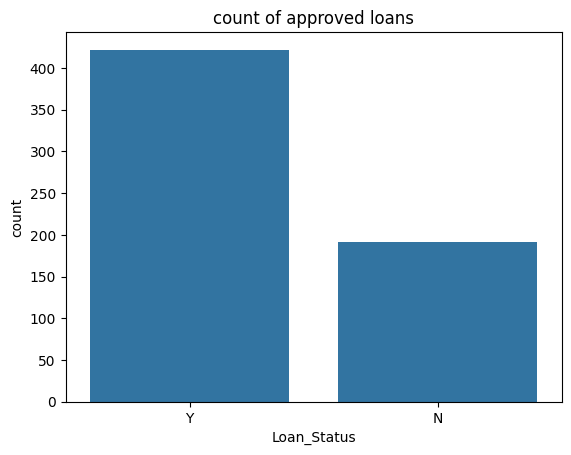

In [20]:
# let us visualize this
sns.countplot(data = train_loan_df, x='Loan_Status')
plt.title('count of approved loans')
plt.show()

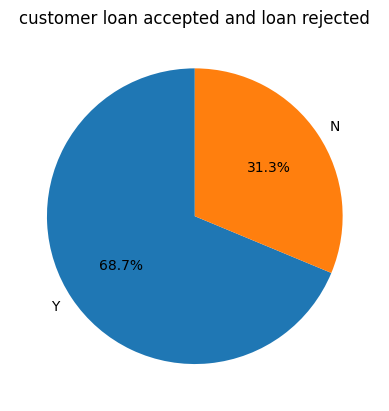

In [21]:
data = [train_loan_df[train_loan_df['Loan_Status']=='Y']['Loan_Status'].count(),train_loan_df[train_loan_df['Loan_Status']=='N']['Loan_Status'].count()]
categori = ['Y','N']

plt.pie(data,
        labels=categori,
        autopct='%1.1f%%',
        startangle=90)

plt.title('customer loan accepted and loan rejected')

plt.show()

<Axes: >

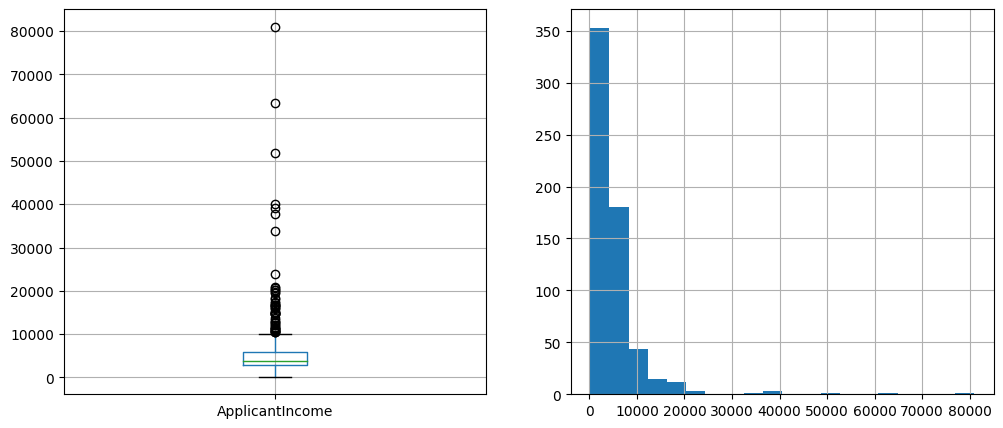

In [22]:
_, ax = plt.subplots(ncols=2,figsize=(12,5))
train_loan_df.boxplot(column='ApplicantIncome', ax=ax[0])
train_loan_df['ApplicantIncome'].hist (bins=20,ax=ax[1])


<Axes: >

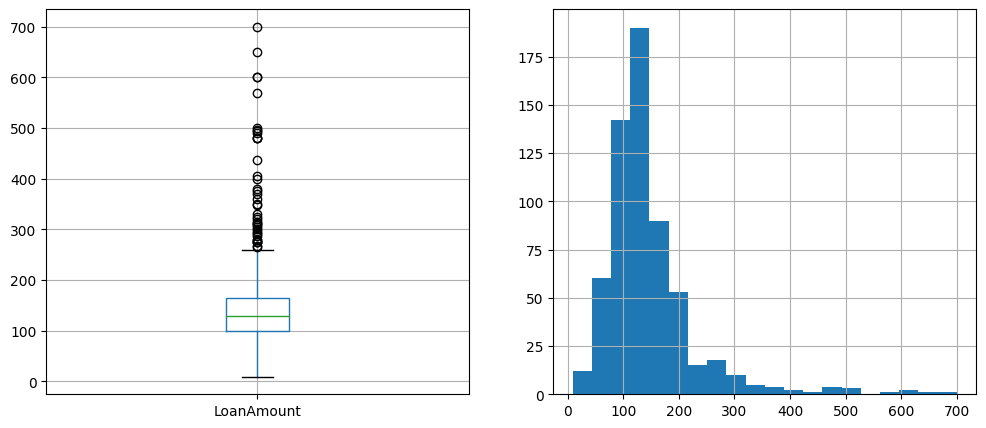

In [23]:
_, ax = plt.subplots(ncols=2,figsize=(12,5))
train_loan_df.boxplot(column='LoanAmount', ax=ax[0])
train_loan_df['LoanAmount'].hist (bins=20,ax=ax[1])


<Axes: >

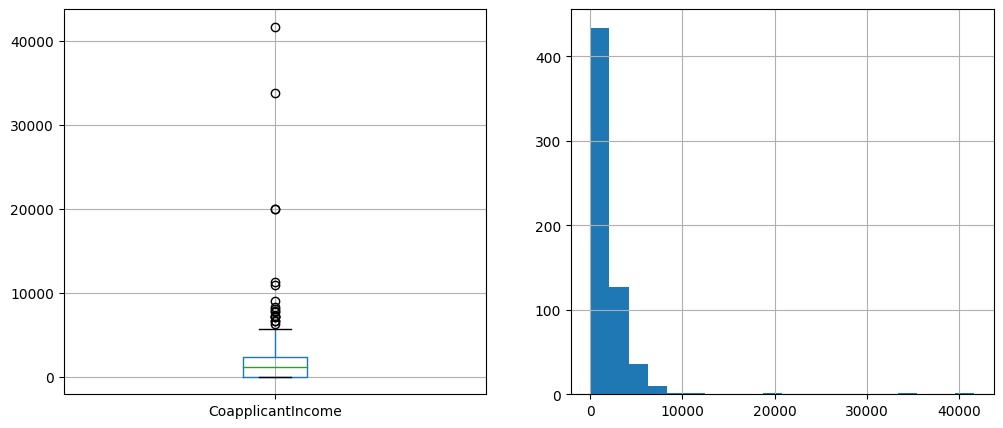

In [24]:
_, ax = plt.subplots(ncols=2,figsize=(12,5))
train_loan_df.boxplot(column='CoapplicantIncome', ax=ax[0])
train_loan_df['CoapplicantIncome'].hist (bins=20,ax=ax[1])

<Axes: >

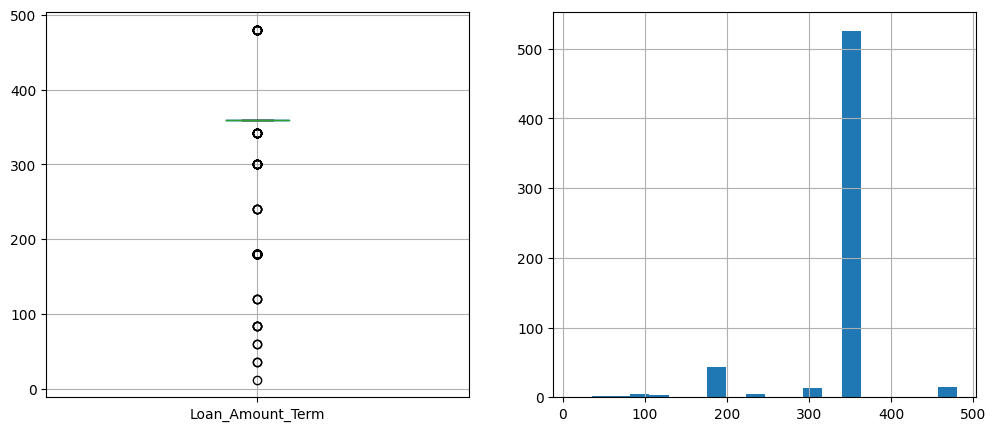

In [25]:
_, ax = plt.subplots(ncols=2,figsize=(12,5))
train_loan_df.boxplot(column='Loan_Amount_Term', ax=ax[0])
train_loan_df['Loan_Amount_Term'].hist (bins=20,ax=ax[1])

<Axes: >

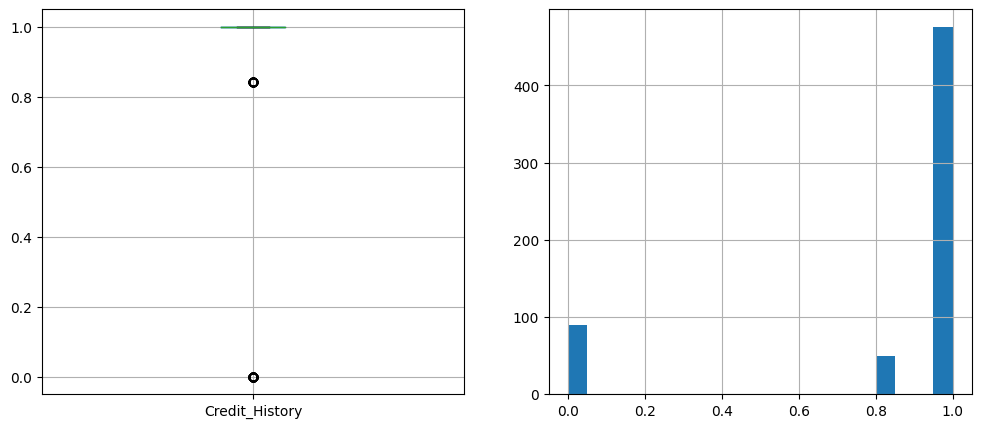

In [26]:
_, ax = plt.subplots(ncols=2,figsize=(12,5))
train_loan_df.boxplot(column='Credit_History', ax=ax[0])
train_loan_df['Credit_History'].hist (bins=20,ax=ax[1])

let us handle the putliers

In [27]:
train_loan_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [28]:
# Define a function to handle outliers using IQR method
def handle_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column.apply(lambda x: max(min(x, upper_bound), lower_bound))

# Apply IQR method to 'ApplicantIncome' column
train_loan_df['ApplicantIncome'] = handle_outliers_iqr(train_loan_df['ApplicantIncome'])

# Apply IQR method to 'CoapplicantIncome' column
train_loan_df['CoapplicantIncome'] = handle_outliers_iqr(train_loan_df['CoapplicantIncome'])

# Apply IQR method to 'LoanAmount' column
train_loan_df['LoanAmount'] = handle_outliers_iqr(train_loan_df['LoanAmount'])


In [29]:
train_loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y


## **Data Analysis**

let us sepreate the categorical columns and the numerical columns

In [30]:
# let drop the Loan_id column
train_loan_df.drop(columns=['Loan_ID'], inplace=True)

In [31]:
# identifying numerical features
numerical_features = { feature for feature in train_loan_df.columns if train_loan_df[feature].dtypes != 'O'}
print(f"the count of numerical features:{len(numerical_features)}")
print(f'numerical features are:\n {numerical_features}')

the count of numerical features:5
numerical features are:
 {'Credit_History', 'LoanAmount', 'Loan_Amount_Term', 'ApplicantIncome', 'CoapplicantIncome'}


there are 5 numerical columns/features in the train set datasets

In [32]:
# identifying the categorical features
categorical_features = { feature for feature in train_loan_df.columns if train_loan_df[feature].dtypes == 'O'}
print(f"the count of categorical features:{len(categorical_features)}")
print(f"categorical features are:\n {categorical_features}")

the count of categorical features:7
categorical features are:
 {'Loan_Status', 'Education', 'Married', 'Dependents', 'Property_Area', 'Self_Employed', 'Gender'}


there are 7 categorical columns

In [33]:
def bar_plot(data, group, target):
    """
    This function returns a bar plot.
    """
    fig, ax = plt.subplots(figsize=(12, 6))
    # This will create a pivot table to be plotted
    temp_df = (data.groupby([group, target]).size() / data.groupby(group)[target].count()).reset_index().pivot(index=group, columns=target, values=0)
    # We plot the stacked bar
    temp_df.plot(kind='bar', stacked=False, ax=ax, color=["blue", "darkred", "green"], legend=True)
    # Set labels and axis
    ax.xaxis.set_tick_params(rotation=0)
    ax.set_xlabel(group)
    ax.set_ylabel('approval rate percentage')

the count of categorical features:7
categorical features are:
 {'Property_Area', 'Loan_Status', 'Dependents', 'Gender', 'Education', 'Self_Employed', 'Married'}


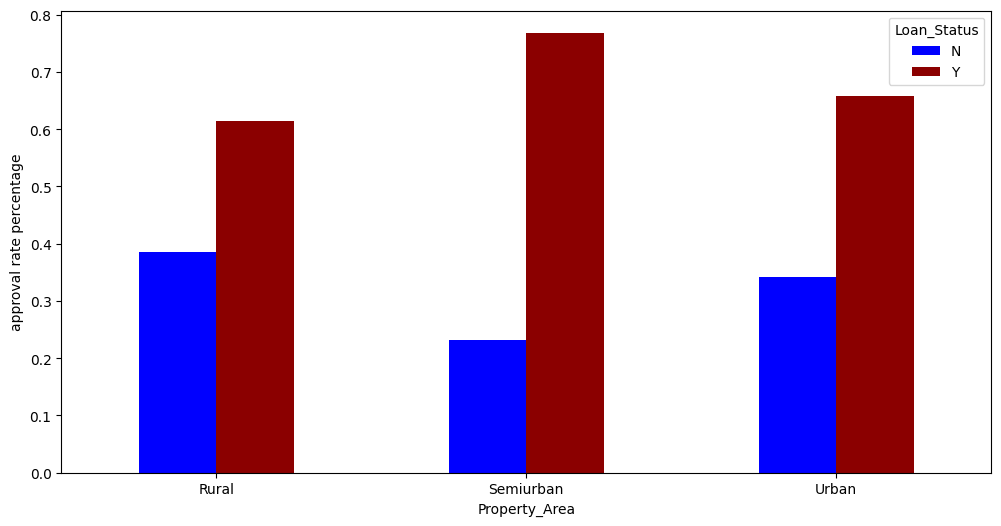

In [34]:
# plotting property and loan status
bar_plot(train_loan_df, "Property_Area", "Loan_Status")


from the above chat of property areas and loan status, we can say
* for theb rural area, only about 63% OF loan applications are approved while about 37% are rejected

* The semiurban recorded the highest loan application approval of more than 78% and the lowest loan application denial of abot 22%.

* while the urban area about 65% loan applications approval and 35% loan appliaction denials

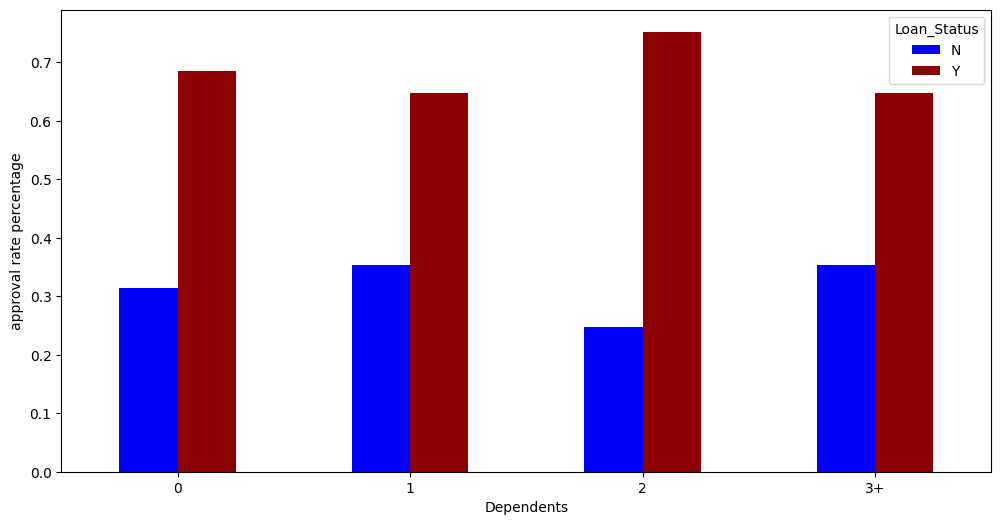

In [35]:
# plotting Dependents and loan status
bar_plot(train_loan_df, "Dependents", "Loan_Status")

from the charts, we can conclude that for all dependency levels, more than35% of the loan applications are approved.

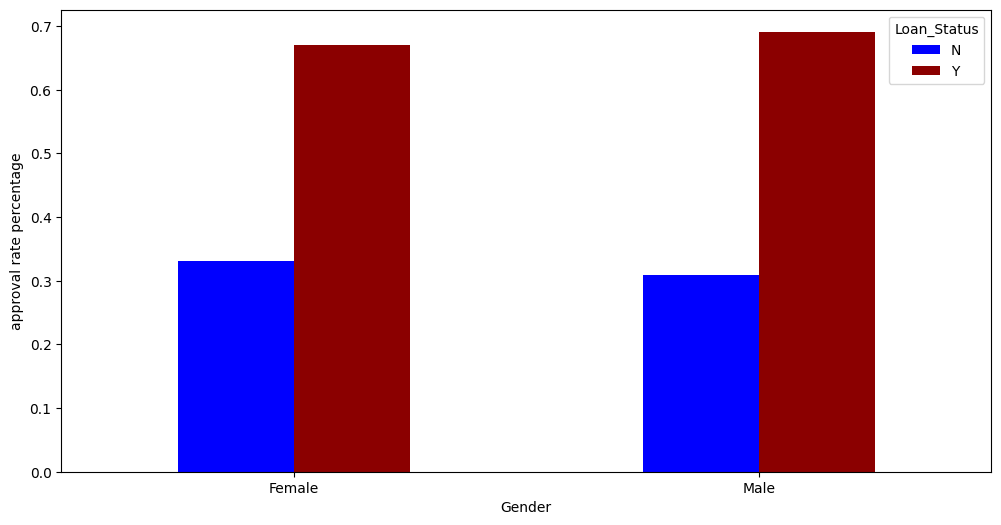

In [36]:
# plotting Gender and loan status
bar_plot(train_loan_df, "Gender", "Loan_Status")

from the chart, we can say that loan appliaction approval or denials are not affected by customers gender. the approval and denials of the loans are even distributed.

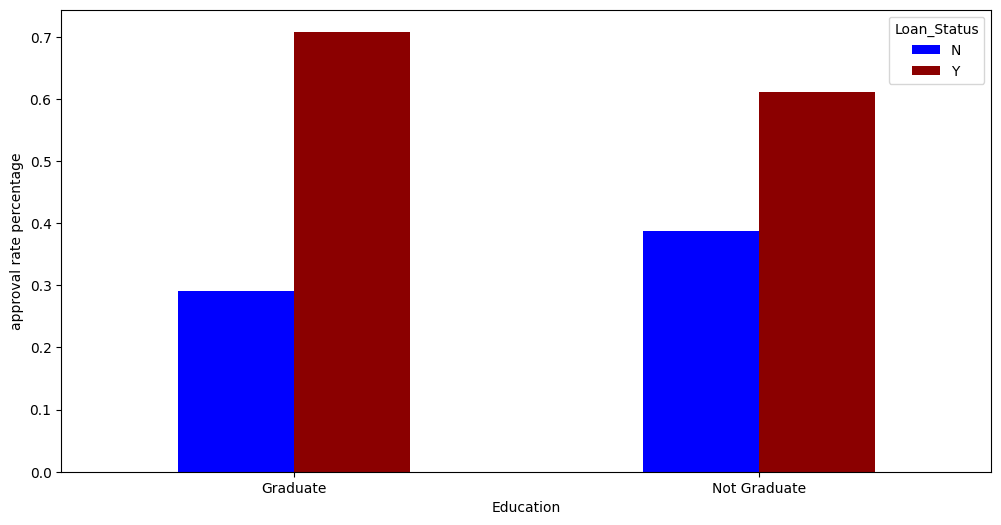

In [37]:
# plotting Education and loan status
bar_plot(train_loan_df, "Education", "Loan_Status")

about 70% percent of the loan appliactions by graduates are approvals and less than 30% declined

also, for the not graduate about 60% of the loan are approved while about 40% are delined


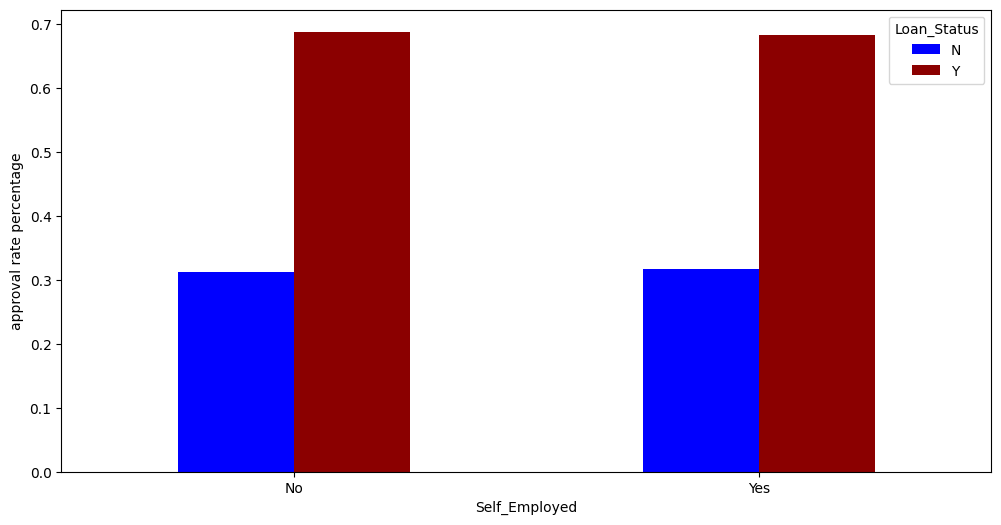

In [38]:
# plotting Self_Employed and loan status
bar_plot(train_loan_df, "Self_Employed", "Loan_Status")

the loan approval or decline are evenly distributed among self_employed applicants and not self-employed applicants

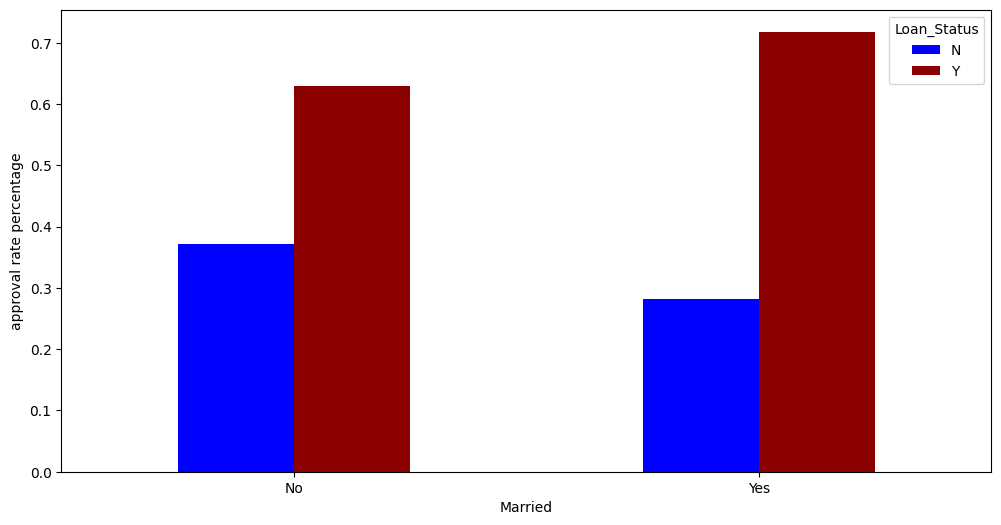

In [39]:
# plotting Married and loan status
bar_plot(train_loan_df, "Married", "Loan_Status")

## **Encoding of Categorical Features**

In [40]:
print(categorical_features)

{'Loan_Status', 'Education', 'Married', 'Dependents', 'Property_Area', 'Self_Employed', 'Gender'}


In [41]:
encode_cat = LabelEncoder()
for feature in categorical_features:
  train_loan_df[feature] = encode_cat.fit_transform(train_loan_df[feature])

In [42]:
train_loan_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849.0,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583.0,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000.0,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583.0,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000.0,0.0,141.000000,360.0,1.0,2,1


<Axes: >

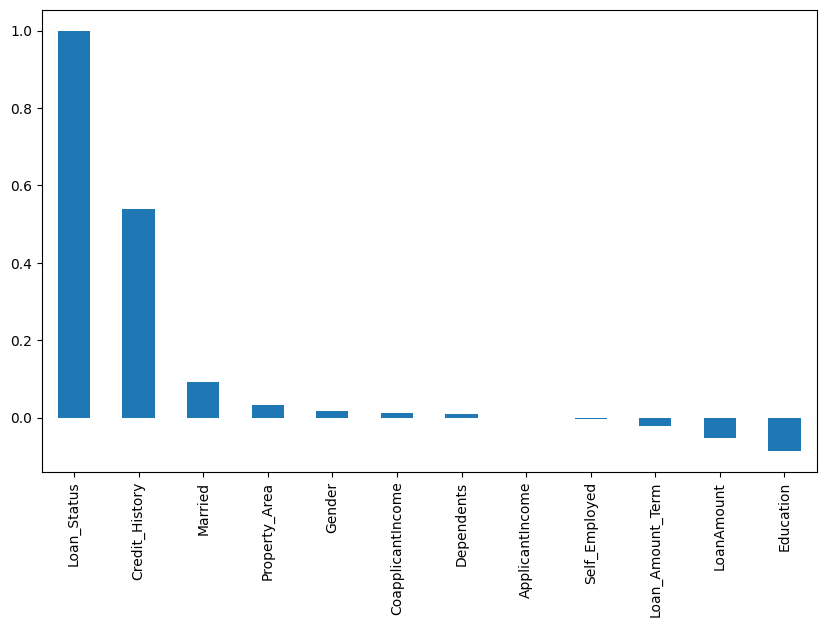

In [43]:
plt.figure(figsize=(10, 6))
train_loan_df.corr()['Loan_Status'].sort_values(ascending=False).plot(kind='bar')

<Axes: >

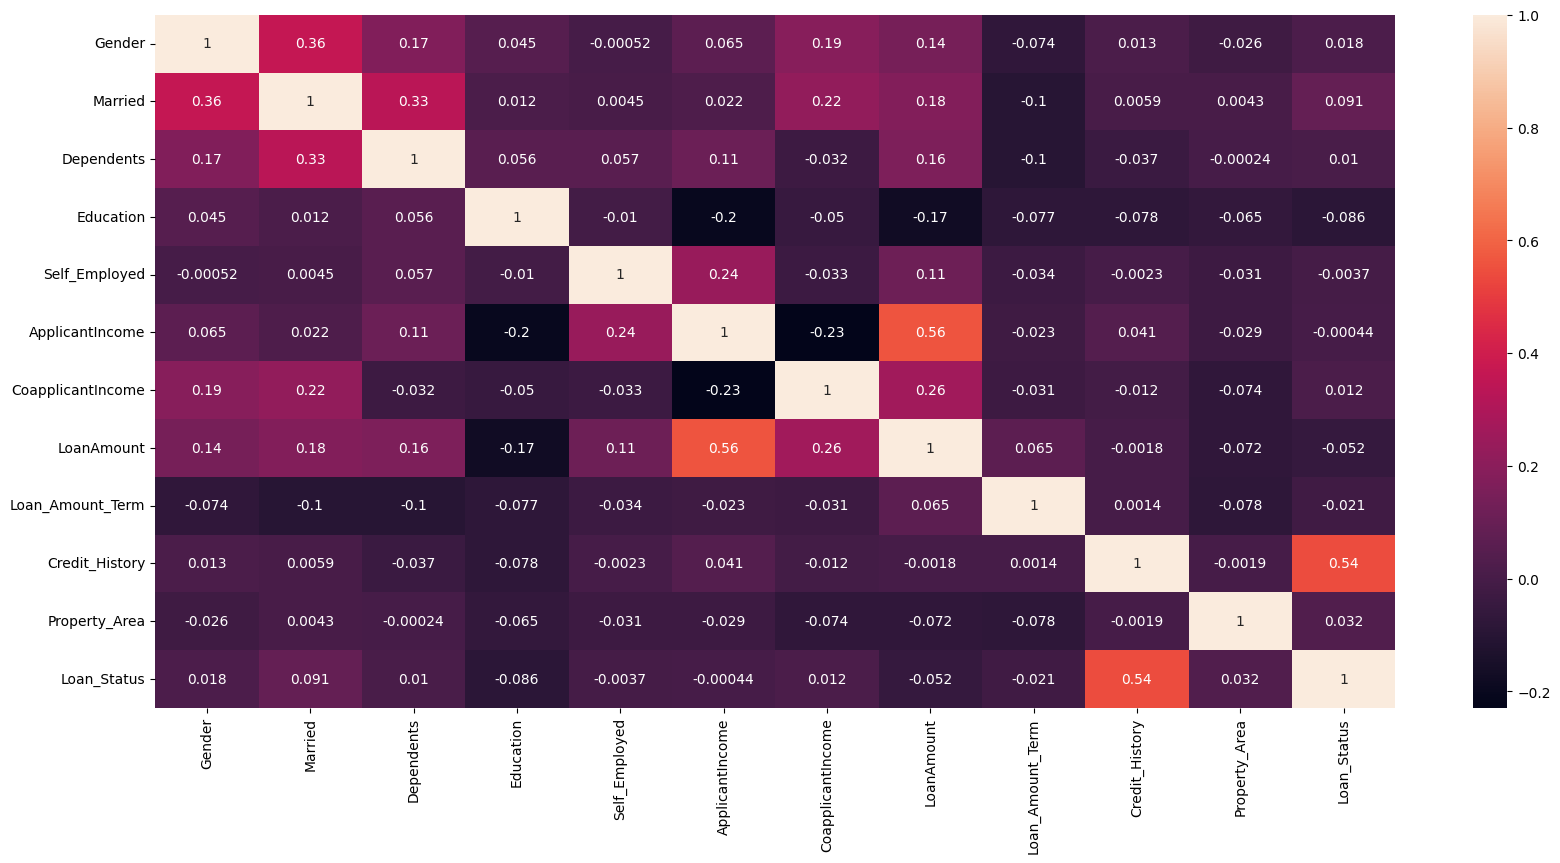

In [44]:
# Finding the correlation between the independent and dependent feature
plt.figure(figsize=(20, 9))
sns.heatmap(train_loan_df.corr(), annot=True)

let us selected the 10 best features for our analysis

In [45]:
X = train_loan_df.drop(columns='Loan_Status')
Y = train_loan_df['Loan_Status']

In [46]:
# selectin the best features
selection = SelectKBest(k=7)
X = selection.fit_transform(X,Y)

In [47]:
train_loan_df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [48]:
# let display the features
selection.get_support()

array([ True,  True, False,  True, False, False, False,  True,  True,
        True,  True])

let us split the train data into train and test sets

In [49]:
# splitting inot train and test sets randomstate=42
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [50]:
print("the shape of the X_train data", x_train.shape)
print("the shape of the X_test data", x_test.shape)
print("the shape of the y_train data", y_train.shape)
print("the shape of the y_test data", y_test.shape)

the shape of the X_train data (491, 7)
the shape of the X_test data (123, 7)
the shape of the y_train data (491,)
the shape of the y_test data (123,)


## **Machine Learning**

we will be training a variety of models to pick the best

### **Training and Testing Logistic Regression Model**

In [51]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

LogisticRegression()

In [52]:
# let predict
lr_pred = lr_model.predict(x_test)

print(f'Accuracy score : {accuracy_score(lr_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(lr_pred, y_test)}')
print(f'Classification report :\n {classification_report(lr_pred, y_test)}')

Accuracy score : 0.7967479674796748
Confusion matrix :
 [[19  1]
 [24 79]]
Classification report :
               precision    recall  f1-score   support

           0       0.44      0.95      0.60        20
           1       0.99      0.77      0.86       103

    accuracy                           0.80       123
   macro avg       0.71      0.86      0.73       123
weighted avg       0.90      0.80      0.82       123



the accuracu score might be impressive (78.9%) but the precision, recall and f1-score for approval(1) and denail(0) arent balanced

### **Training and Testing RandomForest classifier**

In [53]:
R_model = RandomForestClassifier(n_estimators=120,criterion='gini', max_depth=15, min_samples_leaf=100, min_samples_split=5)
R_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=100, min_samples_split=5,
                       n_estimators=120)

In [54]:
R_pred = R_model.predict(x_test)

print(f'Accuracy score : {accuracy_score(R_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(R_pred, y_test)}')
print(f'Classification report :\n {classification_report(R_pred, y_test)}')

Accuracy score : 0.6504065040650406
Confusion matrix :
 [[ 0  0]
 [43 80]]
Classification report :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.65      0.79       123

    accuracy                           0.65       123
   macro avg       0.50      0.33      0.39       123
weighted avg       1.00      0.65      0.79       123



the random regression model performed very poorly

## **Training and Testing Decision Tree**

In [55]:
# Training using Decision Tree
tree_model = DecisionTreeClassifier(criterion='gini', splitter='random', min_samples_leaf=15)
tree_model.fit(x_train, y_train)


DecisionTreeClassifier(min_samples_leaf=15, splitter='random')

In [56]:
tree_pred = tree_model.predict(x_test)

print(f'Accuracy score : {accuracy_score(tree_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(tree_pred, y_test)}')
print(f'Classification report :\n {classification_report(tree_pred, y_test)}')


Accuracy score : 0.7886178861788617
Confusion matrix :
 [[18  1]
 [25 79]]
Classification report :
               precision    recall  f1-score   support

           0       0.42      0.95      0.58        19
           1       0.99      0.76      0.86       104

    accuracy                           0.79       123
   macro avg       0.70      0.85      0.72       123
weighted avg       0.90      0.79      0.82       123



## **Training GradientBoosting**

In [57]:
# GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [58]:
gbc_pred = gbc.predict(x_test)

print(f'Accuracy score : {accuracy_score(gbc_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(gbc_pred, y_test)}')
print(f'Classification report :\n {classification_report(gbc_pred, y_test)}')

Accuracy score : 0.7398373983739838
Confusion matrix :
 [[19  8]
 [24 72]]
Classification report :
               precision    recall  f1-score   support

           0       0.44      0.70      0.54        27
           1       0.90      0.75      0.82        96

    accuracy                           0.74       123
   macro avg       0.67      0.73      0.68       123
weighted avg       0.80      0.74      0.76       123



our datasets for the target variable is very imbalance which might affect the accuracy of our model performance, although our models performance seems ok. we need to do some over sampling on the data to reduce the occurances of TN, FN and improve FP and TP of the model

### **Using SMOTTENN**

In [59]:
smot = SMOTEENN()
x_train_2, y_train_2 = smot.fit_resample(x_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_2)))


The number of classes before fit Counter({1: 342, 0: 149})
The number of classes after fit Counter({0: 152, 1: 119})


In [60]:
# splitting the over sampling dataset
x_train_sap, x_test_sap, y_train_sap, y_test_sap = train_test_split(x_train_2, y_train_2, test_size=0.2)


###**Training Logistic Regression on Sampling set**

In [61]:
# Training Logistic Regression on the sampling
lr_samp = LogisticRegression(C=150, max_iter=150)
lr_samp.fit(x_train, y_train)

# making prediction
lr_samp_pred = lr_samp.predict(x_test_sap)

print(f'Accuracy score : {accuracy_score(lr_samp_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(lr_samp_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(lr_samp_pred, y_test_sap)}')

Accuracy score : 0.8181818181818182
Confusion matrix :
 [[25  0]
 [10 20]]
Classification report :
               precision    recall  f1-score   support

           0       0.71      1.00      0.83        25
           1       1.00      0.67      0.80        30

    accuracy                           0.82        55
   macro avg       0.86      0.83      0.82        55
weighted avg       0.87      0.82      0.82        55



## **Training Random Forest on Sampling**

In [62]:
# Random forest classifier
Rand_samp = RandomForestClassifier(n_estimators=150,criterion='gini', max_depth=15, min_samples_leaf=10, min_samples_split=6)
Rand_samp.fit(x_train_sap, y_train_sap)

# making predictions
Rand_samp_pred = Rand_samp.predict(x_test_sap)

print(f'Accuracy score : {accuracy_score(Rand_samp_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(Rand_samp_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(Rand_samp_pred, y_test_sap)}')


Accuracy score : 0.9090909090909091
Confusion matrix :
 [[30  0]
 [ 5 20]]
Classification report :
               precision    recall  f1-score   support

           0       0.86      1.00      0.92        30
           1       1.00      0.80      0.89        25

    accuracy                           0.91        55
   macro avg       0.93      0.90      0.91        55
weighted avg       0.92      0.91      0.91        55



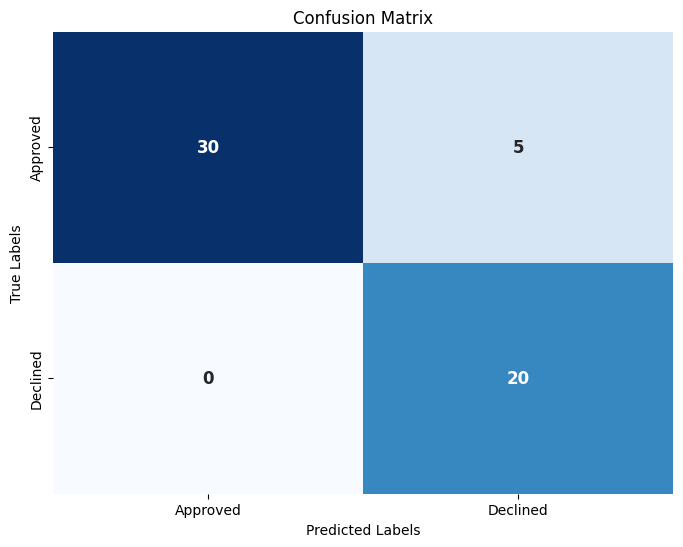

In [63]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test_sap, Rand_samp_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'fontsize': 12, 'fontweight': 'bold'},
            xticklabels=['Approved', 'Declined'], yticklabels=['Approved', 'Declined'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# insights:
* The model achieved an accuracy score of 0.90. The confusion matrix shows 32 true negatives (TN), 3 false positives (FP), 2 false negatives (FN), and 14 true positives (TP).

* Precision for class 0 (non-churn) is 0.94, and for class 1 (churn) is 0.82. Recall for class 0 is 0.91, and for class 1 is 0.88.

* The F1-score for class 0 is 0.93, and for class 1 is 0.85.

In summary, the model exhibits strong performance, with balanced precision, recall, and F1-score across both classes.

### **Training Decision Tree after sample**

In [64]:
# decisionTree Classifier
tree_samp_model = DecisionTreeClassifier(criterion='gini', splitter='random', min_samples_leaf=15)
tree_samp_model.fit(x_train_sap, y_train_sap)
# predicting

tree_samp_pred = tree_samp_model.predict(x_test_sap)

print(f'Accuracy score : {accuracy_score(tree_samp_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(tree_samp_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(tree_samp_pred, y_test_sap)}')


Accuracy score : 0.8181818181818182
Confusion matrix :
 [[25  0]
 [10 20]]
Classification report :
               precision    recall  f1-score   support

           0       0.71      1.00      0.83        25
           1       1.00      0.67      0.80        30

    accuracy                           0.82        55
   macro avg       0.86      0.83      0.82        55
weighted avg       0.87      0.82      0.82        55



### **Train GB Model on sampled set**

In [65]:
# GradientBoostingClassifier
gbc_samp = GradientBoostingClassifier()
gbc_samp.fit(x_train_sap, y_train_sap)

# making prediction
gbc_samp_pred = gbc_samp.predict(x_test_sap)

print(f'Accuracy score : {accuracy_score(gbc_samp_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(gbc_samp_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(gbc_samp_pred, y_test_sap)}')

Accuracy score : 0.9272727272727272
Confusion matrix :
 [[33  2]
 [ 2 18]]
Classification report :
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        35
           1       0.90      0.90      0.90        20

    accuracy                           0.93        55
   macro avg       0.92      0.92      0.92        55
weighted avg       0.93      0.93      0.93        55



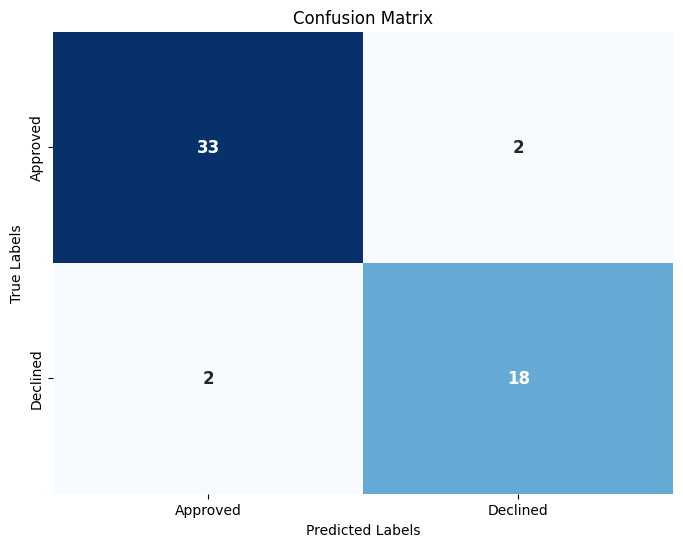

In [66]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test_sap, gbc_samp_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'fontsize': 12, 'fontweight': 'bold'},
            xticklabels=['Approved', 'Declined'], yticklabels=['Approved', 'Declined'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# insights:
* The model achieved an accuracy score of 0.96. The confusion matrix shows 33 true negatives (TN), 1 false positives (FP), 1 false negatives (FN), and 16 true positives (TP).

* Precision for class 0 (non-churn) is 0.97, and for class 1 (churn) is 0.94. Recall for class 0 is 0.97, and for class 1 is 0.94.

* The F1-score for class 0 is 0.97, and for class 1 is 0.94.

In summary, the model exhibits strong performance, with balanced precision, recall, and F1-score across both classes.

## **Saving The GBModels**

In [67]:
import pickle

In [68]:
filename1 = 'bank_loan_eligibility_checker_GBModel.sav'
pickle.dump(gbc_samp, open(filename1,'wb'))

In [69]:
load_model1 = pickle.load(open(filename1, 'rb'))

In [70]:
load_model1.score(x_test_sap, y_test_sap)

0.9272727272727272

## **testing the models on the test_loan_df**

In [71]:
test_loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban


now let us encode the categorical column

In [72]:
# let drop the mer id
test_loan_df.drop(columns=['Loan_ID'], inplace=True)

In [73]:
test_cat_encoder = LabelEncoder()
for features in test_loan_df.columns:
  test_loan_df[features] = test_cat_encoder.fit_transform(test_loan_df[features])

## **Making Predictions On the test_loan_df set**

In [74]:
test_loan_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,251,0,52,11,2,2
1,1,1,1,0,0,102,43,67,11,2,2
2,1,1,2,0,0,230,67,120,11,2,2
3,1,1,2,0,0,43,110,42,11,1,2
4,1,0,0,1,0,120,0,25,11,2,2


now let us load the model

In [75]:
# load the model
import joblib

load_model = joblib.load('/content/bank_loan_eligibility_checker_GBModel.sav')

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',],


In [76]:
test_loan_df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [77]:
test_url = r'/content/drive/MyDrive/loan-test.csv'
test_df = pd.read_csv(test_url)


In [78]:
Loan_ID = test_df['Loan_ID']

we will make the predicted data column to be consistent with the selected features for used in building the model

In [79]:
X_test_pred = test_loan_df.drop(columns=['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount' ])

In [80]:
X_test_pred.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Amount_Term',
       'Credit_History', 'Property_Area'],
      dtype='object')

In [81]:
# make predictions
predictions = load_model.predict(X_test_pred)
probabilities = load_model.predict_proba(X_test_pred)

In [83]:
# create a dataframe with loan_id, predicted outcome and probabilities
prediction_result = pd.DataFrame({'Loan_ID' : Loan_ID, 'Eligibility_status' : predictions, ' probability_of_approval': probabilities[:, 1]})

# display the table
prediction_result.head()

,Loan_ID,Eligibility_status,probability_of_approval
0,LP001015,1,0.681339
1,LP001022,1,0.681339
2,LP001031,1,0.681339
3,LP001035,1,0.681339
4,LP001051,0,0.349458
